# Problem 3: Text Mining The Bible

In [34]:
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gwhit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [37]:
import pandas as pd
import os
import numpy as np
import scattertext as st
import matplotlib.pyplot as plt
import spacy
from pprint import pprint
from mlxtend.frequent_patterns import apriori
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GMM
from sklearn.cluster import AgglomerativeClustering

In [19]:
convention_df = st.SampleCorpora.ConventionData2012.get_data()
convention_df.head()

,party,speaker,text
0,democrat,BARACK OBAMA,Thank you. Thank you. Thank you. Thank you so ...
1,democrat,MICHELLE OBAMA,"Thank you so much. Tonight, I am so thrilled a..."
2,democrat,RICHARD DURBIN,Thank you. It is a singular honor to be here t...
3,democrat,JOSEPH BIDEN,"Hey, Delaware. \nAnd my favorite Democrat, Jil..."
4,democrat,JILL BIDEN,"Hello. \nThank you, Angie. I'm so proud of how..."


Please performe standard text transformations - move all case to lower, remove numbers, remove punctation, remove common stopwords, strip whitespace, and get rid of special characters. You will consider n-grams, co-ocurrances, stemming, and term document matrix.

In [20]:
bible = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/bible_asv.csv")

In [21]:
bible.head()

,Unnamed: 0,field,Testaments,Sections,Books,Chapters,Verses,text
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,In the beginning God created the heavens and t...
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,And the earth was waste and void; and darkness...
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,"And God said, Let there be light: and there wa..."
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,"And God saw the light, that it was good: and G..."
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,"And God called the light Day, and the darkness..."


# Preprocessig

In [22]:
#changing all text to lowercase
bible['text'] = bible['text'].str.lower()
bible.head()

,Unnamed: 0,field,Testaments,Sections,Books,Chapters,Verses,text
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,in the beginning god created the heavens and t...
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,and the earth was waste and void; and darkness...
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,"and god said, let there be light: and there wa..."
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,"and god saw the light, that it was good: and g..."
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,"and god called the light day, and the darkness..."


In [23]:
#remove numbers from text
bible.text = bible.text.str.replace('\d+', '')
bible.head()

,Unnamed: 0,field,Testaments,Sections,Books,Chapters,Verses,text
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,in the beginning god created the heavens and t...
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,and the earth was waste and void; and darkness...
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,"and god said, let there be light: and there wa..."
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,"and god saw the light, that it was good: and g..."
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,"and god called the light day, and the darkness..."


In [24]:
#remove punctuation
bible['text'] = bible['text'].str.replace('[^\w\s]','')
bible.head()

,Unnamed: 0,field,Testaments,Sections,Books,Chapters,Verses,text
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,in the beginning god created the heavens and t...
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,and the earth was waste and void and darkness ...
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,and god said let there be light and there was ...
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,and god saw the light that it was good and god...
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,and god called the light day and the darkness ...


In [25]:
#removing stopwords
stop = stopwords.words('english')
bible['text'] = bible['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
bible.head()

,Unnamed: 0,field,Testaments,Sections,Books,Chapters,Verses,text
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,beginning god created heavens earth
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,earth waste void darkness upon face deep spiri...
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,god said let light light
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,god saw light good god divided light darkness
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,god called light day darkness called night eve...


In [26]:
#strip whitespace
#bible['text'] = bible.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
#bible.head()

In [27]:
#Vectorizes text feature using term frequency-inverse document frequency 
vec = TfidfVectorizer()
X = vec.fit_transform(bible['text'].values.astype('str'))
text = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [28]:
bible = pd.merge(bible, text, left_index=True, right_index=True)
bible = bible.drop('text',axis=1)

In [29]:
bible.head()

,Unnamed: 0,field_x,Testaments,Sections,Books,Chapters,Verses,aaron,aarons,abaddon,...,zophim,zorah,zorathites,zorites,zuar,zuph,zur,zuriel,zurishaddai,zuzim
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
bible.columns

Index(['Unnamed: 0', 'field_x', 'Testaments', 'Sections', 'Books', 'Chapters',
       'Verses', 'aaron', 'aarons', 'abaddon',
       ...
       'zophim', 'zorah', 'zorathites', 'zorites', 'zuar', 'zuph', 'zur',
       'zuriel', 'zurishaddai', 'zuzim'],
      dtype='object', length=12660)

# PCA

In [31]:
X_bible = bible.drop(bible.ix[:,0:7].head(0).columns, axis=1)

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [32]:
X_bible.head()

,aaron,aarons,abaddon,abagtha,abanah,abarim,abase,abased,abasing,abated,...,zophim,zorah,zorathites,zorites,zuar,zuph,zur,zuriel,zurishaddai,zuzim
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
pca = PCA(n_components=2)
pca.fit(X_bible)
X_bible_2PCA = pca.transform(X_bible)

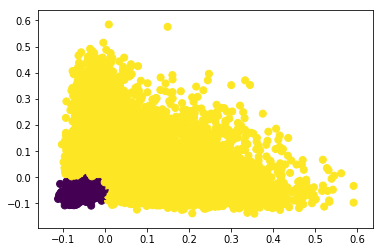

In [39]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X_bible_2PCA)
plt.scatter(X_bible_2PCA[:, 0], X_bible_2PCA[:, 1], c=labels,
            s=50, cmap='viridis');

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Loca

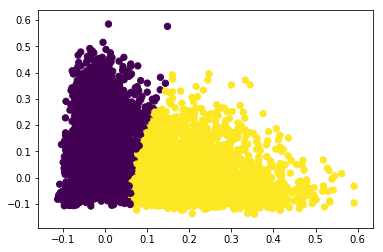

In [41]:
gmm = GMM(n_components=2).fit(X_bible_2PCA)
labels = gmm.predict(X_bible_2PCA)
plt.scatter(X_bible_2PCA[:, 0], X_bible_2PCA[:, 1], c=labels, s=40, cmap='viridis');

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Loca

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Conti

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Conti

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Conti

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-pa

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Conti

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Loca

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Conti

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Conti

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Conti

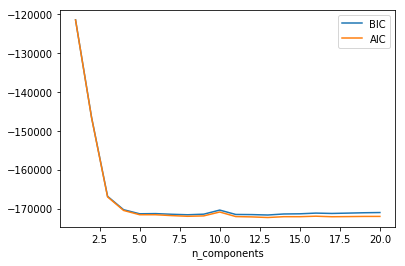

In [42]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(X_bible_2PCA)
          for n in n_components]

plt.plot(n_components, [m.bic(X_bible_2PCA) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_bible_2PCA) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

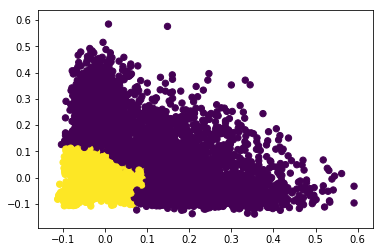

In [43]:
clustering = AgglomerativeClustering().fit(X_bible_2PCA)
labels = clustering.labels_
plt.scatter(X_bible_2PCA[:, 0], X_bible_2PCA[:, 1], c=labels, s=40, cmap='viridis')

In [50]:
bible.columns

Index(['Unnamed: 0', 'field', 'Testaments', 'Sections', 'Books', 'Chapters',
       'Verses', 'text'],
      dtype='object')

In [51]:
bible.iloc[0]

Unnamed: 0                                      1
field                                     1001001
Testaments                                     OT
Sections                                      Law
Books                                         gen
Chapters                                    gen_1
Verses                                    gen_1:1
text          beginning god created heavens earth
Name: 0, dtype: object

In [52]:
bookz = bible.Books.unique()

In [53]:
bookz

array(['gen', 'exod', 'lev', 'num', 'deut', 'josh', 'judg', 'ruth',
       '1sam', '2sam', '1kgs', '2kgs', '1chro', '2chro', 'ezra', 'neh',
       'esth', 'job', 'psa', 'prov', 'ecc', 'song', 'isa', 'jer', 'lam',
       'ezek', 'dan', 'hosea', 'joel', 'amos', 'obad', 'jonah', 'micah',
       'nahum', 'hab', 'zeph', 'hag', 'zech', 'mal', 'matt', 'mark',
       'luke', 'john', 'acts', 'rom', '1cor', '2cor', 'gal', 'eph',
       'phil', 'col', '1thes', '2thes', '1tim', '2tim', 'tit', 'phile',
       'heb', 'jas', '1pet', '2pet', '1john', '2john', '3john', 'jude',
       'rev'], dtype=object)

['gen', 'exod', 'lev', 'num', 'deut', 'josh', 'judg', 'ruth', '1sam', '2sam', '1kgs', '2kgs', '1chro', '2chro', 'ezra', 'neh', 'esth', 'job', 'psa', 'prov', 'ecc', 'song', 'isa', 'jer', 'lam', 'ezek', 'dan', 'hosea', 'joel', 'amos', 'obad', 'jonah', 'micah', 'nahum', 'hab', 'zeph', 'hag', 'zech', 'mal', 'matt', 'mark', 'luke', 'john', 'acts', 'rom', '1cor', '2cor', 'gal', 'eph', 'phil', 'col', '1thes', '2thes', '1tim', '2tim', 'tit', 'phile', 'heb', 'jas', '1pet', '2pet', '1john', '2john', '3john', 'jude', 'rev']

In [54]:
nlp = spacy.load('en')

In [55]:
corpus = st.CorpusFromPandas(bible,category_col='Books',text_col='text',nlp=nlp).build()

In [56]:
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['jehovah', 'unto', 'saith', 'shalt', 'spake', 'burntoffering', 'hath', 'thy', 'judah', 'thou']


In [57]:
for x in bookz :
    x=x
    term_freq_df = corpus.get_term_freq_df()
    term_freq_df['Book Score'] = corpus.get_scaled_f_scores(x)
    print("10 most frequent words in", x)
    pprint(list(term_freq_df.sort_values(by='Book Score',ascending=False).index[:10]))


10 most frequent words in gen
['years begat',
 'rebekah',
 'unto joseph',
 'jacob said',
 'laban',
 'leah',
 'abram',
 'lived begat',
 'rachel',
 'joseph said']
10 most frequent words in exod
['twined linen',
 'twined',
 'fine twined',
 'scarlet fine',
 'acacia wood',
 'acacia',
 'purple scarlet',
 'curtain',
 'rings',
 'blue purple']
10 most frequent words in lev
['estimation',
 'pronounce',
 'thy estimation',
 'jubilee',
 'unclean even',
 'priest shall',
 'bathe',
 'goat',
 'wash clothes',
 'leprosy']
10 most frequent words in num
['one silver',
 'helambs year',
 'prince children',
 'families fathers',
 'one ram',
 'helambs',
 'balak',
 'number names',
 'flour mingled',
 'balaam']
10 most frequent words in deut
['giveth thee',
 'shall choose',
 'thy gates',
 'command thee',
 'within thy',
 'land jehovah',
 'jehovah thy',
 'thy god',
 'fruit thy',
 'place jehovah']
10 most frequent words in josh
['border went',
 'joshua said',
 'passed along',
 'reuben children',
 'unto joshua',
 'ai'